In [2]:
import numpy as np
import pandas as pd
import nltk
from os import getcwd
import re
import string
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import preprocessing


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/content/../temp/
@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.
I have a really good m&amp;g idea but I'm never going to meet them :(((


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Training accuracy: 0.9938666666666667
Test accuracy score of the model is: 0.9932
Misclassified tweets are present in the location of test data given by the following array:
 [10, 16, 379, 386, 780, 1003, 1072, 1282, 1313, 1332, 1490, 1798, 2044, 2069, 2256, 2273, 2373]
[1, 0, 1, 1, 1]
Training accuracy: 0.7622666666666666
Test accuracy score of the model is: 0.6992
Misclassified tweets are present in the location of test data given by the following array:
 [1, 3, 6, 7, 9, 10, 13, 16, 17, 18, 22, 33, 35, 37, 45, 49, 51, 55, 61, 62, 70, 73, 77, 78, 79, 88, 90, 92, 95, 96, 97, 98, 100, 101, 108, 109, 110, 111, 112, 115, 116, 124, 125, 126, 129, 133, 135, 136, 139, 143, 146, 147, 148, 150, 151, 152, 156, 157, 161, 163, 168, 169, 171, 174, 176, 183, 185, 190, 191, 194, 195, 196, 197, 198, 205, 207, 212, 213, 215, 216, 219, 221, 225, 227, 232, 234, 236, 240, 241, 244, 246, 248, 249, 250, 251, 253, 261, 263, 266, 268, 271, 275, 281, 283, 285, 287, 294, 298, 301, 304, 307, 320, 326, 333, 334,

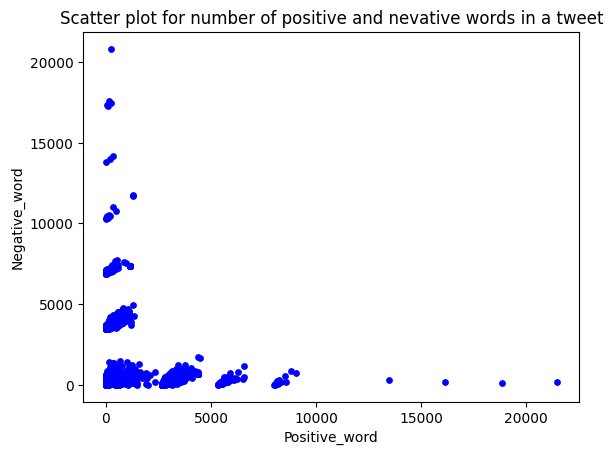

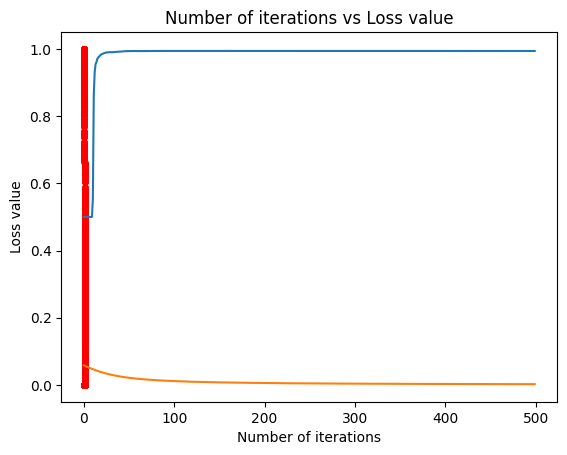

In [3]:

# Download the data needed for this assignment. Check out the [documentation for the twitter_samples dataset](http://www.nltk.org/howto/twitter.html).
# * twitter_samples and stopwords: While running on a local computer you need to download them using
# ```Python
# nltk.download('twitter_samples')
# nltk.download('stopwords')
# * `clean_tweet()`: cleans, tokenizes, removes stopwords, and converts words to stems.
# * `build_frequency()`: this counts how often a word in the the entire set dataset of tweets was associated with a positive label '1' or a negative label '0', then builds the `frequency_words` dictionary, where each key is a (word,label) tuple, and the value is the count of its frequency within the corpus of tweets.
# * The `frequency_words` dictionary is the frequency dictionary that's being built.



nltk.download('twitter_samples')
nltk.download('stopwords')


# this code allows us to prevent downloading data again while refreshing our workspace
filePath = f"{getcwd()}/../temp/"
nltk.data.path.append(filePath)

print(filePath)


# ### Data processing
# * The `twitter_samples` contains subsets of 5,000 positive tweets, 5,000 negative tweets, and the full set of 10,000 tweets.

from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer




def clean_tweet(tweet):

    # tweets_clean: a list of words containing the processed tweet
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market symbols like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in string.punctuation and
                word not in stopwords_english):
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def build_frequency(tweets, y_np):


    yslist = np.squeeze(y_np).tolist()

    freqs = {}
    for i in range(len(tweets)):
        tweet = tweets[i]
        y = yslist[i]
        for word in clean_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

#Removes emojies
def emoji_remover(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweet = re.sub(r'\:\)*', '', tweet)
    tweet = re.sub(r'\:\(*', '', tweet)
    tweet = re.sub(r'\:\-\)*', '', tweet)
    tweet = re.sub(r'\:\-\(*', '', tweet)
    tweet = re.sub(r'\:\d*', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in string.punctuation and
                word not in stopwords_english):
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean




# select the set of positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')




print(positive_tweets[7])
print(negative_tweets[10])


# ### Feature Extraction


def extract_features(tweet, freqs):

    # clean_tweet tokenizes, stems, and removes stopwords
    word_l = clean_tweet(tweet)

    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3))
    x[0,0] = 1

    for word in word_l:

        # increment the word count when the  label is positive
        x[0,1] = x[0,1] + freqs.get((word, 1.0),0)
        # increment the word count when the  label is negative
        x[0,2] = x[0,2] + freqs.get((word, 0.0),0)

    return x

 #Feature extractor for tweets without emojies
def extract_features_emoji(tweet, freqs):

    # clean_tweet tokenizes, stems, and removes stopwords
    word_l = emoji_remover(tweet)

    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3))
    x[0,0] = 1

    for word in word_l:

        # increment the word count when the  label is positive
        x[0,1] = x[0,1] + freqs.get((word, 1.0),0)
        # increment the word count when the  label is negative
        x[0,2] = x[0,2] + freqs.get((word, 0.0),0)

    return x




def batch_feature_extractor(tweet):
    length = len(tweet)
    data_set=[]
    for i in range(length):
        data_set.append(extract_features(tweet[i], frequency_words))
    data_set = np.array(data_set)
    data_set = data_set.reshape(length,3)
    return data_set

def batch_feature_extractor_emoji(tweet):
    length = len(tweet)
    data_set=[]
    for i in range(length):
        data_set.append(extract_features_emoji(tweet[i], frequency_words))
    data_set = np.array(data_set)
    data_set = data_set.reshape(length,3)
    return data_set




def sigmoid(z):
    h = 1 / (1 + np.exp(-z))
    return h



def predict_positivity_score(tweet, freqs, theta):
    x_test = preprocessing.normalize(tweet)
    return(predict(x_test,theta))

def predict(x_test,theta):
    y1 = np.dot(x_test,theta)
    y_hat = []
    y_pred = sigmoid(y1)
    for element in y_pred:
        if element >= 0.5:
            y_hat.append(1)
        else:
            y_hat.append(0)
    return y_hat


N = 7500
def gradientDescent(x, y, theta, alpha, num_iters):
    x = np.array(x)
    x = preprocessing.normalize(x)
    y = np.array(y)
    list_of_loss_values=[]
    list_of_training_accuracy=[]
    training_accuracy = 0
    for i in range(0, num_iters):
        theta1 = theta
        z = np.dot(x, theta)
        h = sigmoid(z)
        J = 1/N * np.dot(x.T,(h - y))
        theta = theta - alpha * J
        list_of_loss_values.append(theta1- theta)
        list_of_training_accuracy.append(accuracy_score(y, predict(x,theta)))
#     list_of_loss_values is the loss for each iteration which , same is the case with training accuracy
    training_accuracy  = accuracy_score(y, predict(x,theta))
    print('Training accuracy:',training_accuracy)
    return J, theta,list_of_loss_values,list_of_training_accuracy





#Identifies the index of misclassified tweets
def missclassification(y_test, y_pred):
    misclassified=[]
    for i, (y_test,y_pred) in enumerate(zip(y_test,y_pred)):
        if y_test!=y_pred:
            misclassified.append(i)
    return misclassified



def test_logistic(test_x, test_y, freqs, theta):


    y_pred = predict_positivity_score(test_x, freqs, theta)
    misclassified=missclassification(test_y, y_pred)
    y_pred = np.array(y_pred)
    test_y = np.array(test_y)
    accuracy = accuracy_score(test_y, y_pred)
    print("Test accuracy score of the model is:", accuracy)
    print("Misclassified tweets are present in the location of test data given by the following array:\n", misclassified)
#     return misclassified


# * Train test split: 25% will be in the test set, and 75% in the training set.



# Train test split: 25% test set, and 75% training set.
tweet_train= positive_tweets[0:3750] + negative_tweets[0:3750]
tweet_test = positive_tweets[3750:5000] + negative_tweets[3750:5000]
y_train= np.append(np.ones((len(positive_tweets[0:3750]), 1)), np.zeros((len(negative_tweets[0:3750]), 1)), axis=0)
y_test= np.append(np.ones((len(positive_tweets[3750:5000]), 1)), np.zeros((len(negative_tweets[3750:5000]), 1)), axis=0)





frequency_words = build_frequency(tweet_train, y_train)




#Scatter plot of number of positive and nevative words in a tweet
x_train = batch_feature_extractor(tweet_train)
feature_dataframe = pd.DataFrame(x_train,columns=['one', 'Positive_word', 'Negative_word'])
feature_dataframe.plot.scatter(x = 'Positive_word', y = 'Negative_word',s=15, c='b');
plt.title("Scatter plot for number of positive and nevative words in a tweet")



#Scatter plot of normalized amount of positive and nevative words in a tweet
x_train_n = preprocessing.normalize(x_train)
feature_dataframe = pd.DataFrame(x_train_n,columns=['one', 'Positive_word', 'Negative_word'])
feature_dataframe.plot.scatter(x = 'Positive_word', y = 'Negative_word',s=15, c='r');
plt.title("Scatter plot for proportion of positive and nevative words in a tweet")



# NOTE : call gradient descent to get coefficents and then pass that coefficents into predict function
# something like : predict_positivity_score(tweet, frequency_words, coefficents)
alpha = 0.2 # learning rate
num_iters = 500
theta = np.random.randn(3,1) # random initialization
theta = np.array(theta)
J, coefficients,list_of_loss_values,list_of_training_accuracy = gradientDescent(x_train, y_train, theta, alpha, num_iters)





#accuracy and loss plots as a function of number of iterations
plt.plot(list_of_training_accuracy)
plt.title("Number of iterations vs Training accuracy")
plt.xlabel('Number of iterations')
plt.ylabel('Training accuracy')




list_of_loss_values = np.array(list_of_loss_values)
# print(list_of_loss_values[:,1])
plt.plot(list_of_loss_values[:,2])
plt.title("Number of iterations vs Loss value")
plt.xlabel('Number of iterations')
plt.ylabel('Loss value')


#Test



x_test = batch_feature_extractor(tweet_test)
test_logistic(x_test, y_test,frequency_words,coefficients)


#Testing with new data

my_tweet = ['Let that sink in',
            'My psychiatrist told me I was crazy and I said I want a second opion. He said okay, you are ugly too ',
            'I’d rather have a drink with Mel Gibson in his hotel tonight than Bill Cosby.',
            'Building trust is the key to success in any relationship. Excuses, irregularity, chronically late, etc., are the ingredients to kill the TRUST.',
            'We are best friends. Always remember that if you fall i will pick you up. After I finish laughing'
           ]





my_tweet_test = batch_feature_extractor(my_tweet)
y_prediction_my_tweet = predict_positivity_score(my_tweet_test,frequency_words,coefficients)
print(y_prediction_my_tweet)




#Training and test accuracy on removed emoji tweets
theta_e = np.random.randn(3,1) # random initialization
x_train_wo_emoji = batch_feature_extractor_emoji(tweet_train)
J, coefficients1,list_of_loss_values,list_of_training_accuracy = gradientDescent(x_train_wo_emoji, y_train, theta_e, alpha, num_iters)
x_test_wo_emoji = batch_feature_extractor_emoji(tweet_test)
test_logistic(x_test_wo_emoji, y_test,frequency_words,coefficients1)


# The training accuracy of the model with emojis removed is: 0.7621333333333333
#
# The test accuracy score of the model with emojis removed is: 0.7






